# Лабораторная работа №5. Анализ главных компонент PCA

Пан Анатолий Эдуардович<br>
Группа 932209<br>
Набор данных: https://archive.ics.uci.edu/dataset/109/wine

Загрузка датасета

In [129]:
!pip install ucimlrepo -q

In [130]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets
df = wine.data.original

In [131]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

Импорт необходимых модулей и библиотек

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Задача 1

Дан набор признаков, и требуется сократить количество признаков, сохраняя при этом дисперсию данных. Использовать анализ главных компонент с помощью класса РСА библиотеки scikit- leam.

Стандартизация данных

In [133]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Объект PCA

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=2)

Обучение PCA

In [136]:
X_reduced = pca.fit_transform(X_scaled)

Расчет объясненной дисперсии для каждой компоненты

Объясненная дисперсия используется для измерения доли изменчивости прогнозов модели машинного обучения. Проще говоря, это разница между ожидаемым значением и прогнозируемым значением

In [137]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 ])

`explained_variance`:

- Значение `explained_variance[0]` (0.36198848) представляет процент общей дисперсии данных, который объясняется первой главной компонентой. Первая главная компонента объясняет примерно 35.9% общей дисперсии данных.

- Значение `explained_variance[1]` (0.1920749) представляет процент общей дисперсии данных, который объясняется второй главной компонентой. Вторая главная компонента объясняет примерно 18.7% общей дисперсии данных.

In [138]:
sum(explained_variance)

0.554063383569353

С использованием только двух главных компонент мы сохранили около 55.4% дисперсии данных

In [139]:
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.36198848, 0.55406338])

`cumulative_variance`:

- Значение `cumulative_variance[0]` (0.36198848) представляет кумулятивный процент объясненной дисперсии после учета только первой главной компоненты. Когда мы учитываем только первую главную компоненту, сохраняем 35.9% дисперсии данных.

- Значение `cumulative_variance[1]` (0.55406338) представляет кумулятивный процент объясненной дисперсии после учета обеих первой и второй главных компонент. Когда мы учитываем и первую, и вторую главные компоненты, то сохраняем в сумме 54.6% дисперсии данных.

Визуализация данных с учетом двух главных компонент чтобы посмотреть, как они помогают в разделении классов

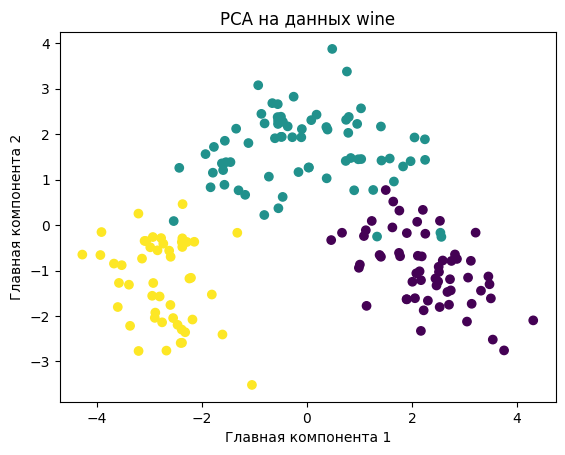

In [140]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.squeeze(), cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("PCA на данных wine")
plt.show()

## Задача 2

Уменьшение количества признаков, когда данные линейно неразделимы. Вы подозреваете, что ваши данные линейно неразделимы, и требуется сократить размерности. Применить расширение анализа главных компонент, в котором используются ядра для нелинейного уменьшения размерности.

Kernel PCA позволяет учитывать нелинейные зависимости в данных и уменьшать размерность, что может быть полезно в случаях, когда данные не линейно разделимы.

In [177]:
from sklearn.decomposition import KernelPCA

Создадим объект KernelPCA с использованием RBF-ядра (гауссово ядро)

In [268]:
kpca = KernelPCA(kernel='rbf', n_components=2)

Обучение KernelPCA и преобразование данных

In [269]:
X_reduced = kpca.fit_transform(X_scaled)

Визуализация

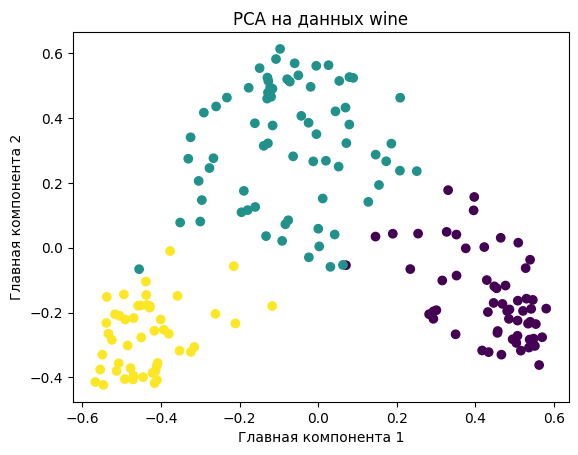

In [270]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y.squeeze(), cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.title("PCA на данных wine")
plt.show()

## Сделаю логическую регрессию для проверки того, как разбиваются даннеы

In [271]:
from sklearn.model_selection import train_test_split

Разделим набор данных на обучающую и тестовую выборки

In [274]:
X = wine.data.features
y = wine.data.targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Выполним стандартизацию данных

In [275]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Создание объекта PCA и обучение

In [283]:
pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# X_train = kpca.fit_transform(X_train)
# X_test = kpca.transform(X_test)

Логистическая регрессия

In [284]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

Выполним предсказание

In [285]:
y_pred = classifier.predict(X_test)

In [286]:
from sklearn.metrics import confusion_matrix

In [287]:
cm = confusion_matrix(y_test, y_pred)

Визуализируем для обучаю выборки

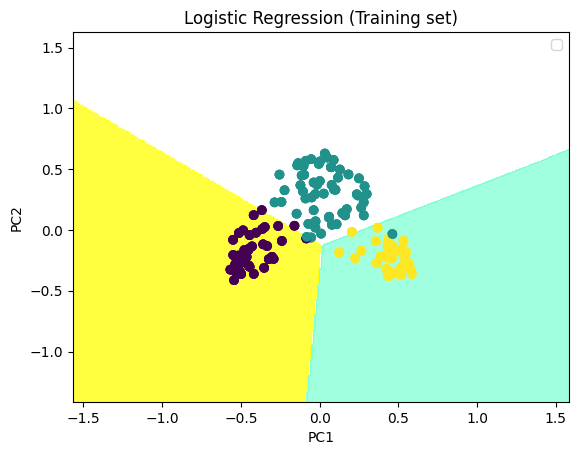

In [288]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                     stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                     stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[:, 0],
                X_set[:, 1],
                c=y_set.squeeze(),
                cmap='viridis')

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

Визуализируем для тестовой выборки

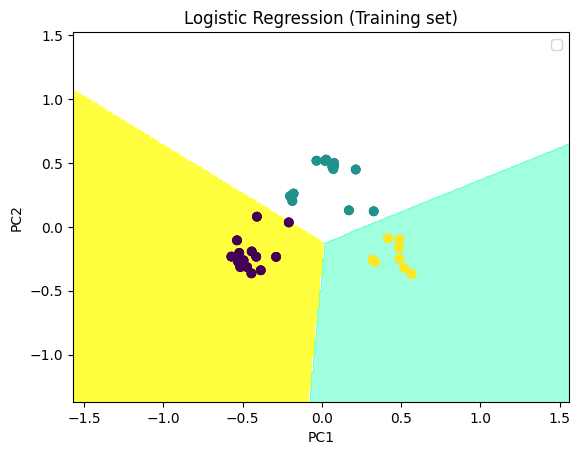

In [289]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                     stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                     stop=X_set[:, 1].max() + 1, step=0.01))

plt.contourf(X1, X2,
             classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,
             cmap=ListedColormap(('yellow', 'white', 'aquamarine')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[:, 0],
                X_set[:, 1],
                c=y_set.squeeze(),
                cmap='viridis')

plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend

# show scatter plot
plt.show()

График двух первых основных компонент

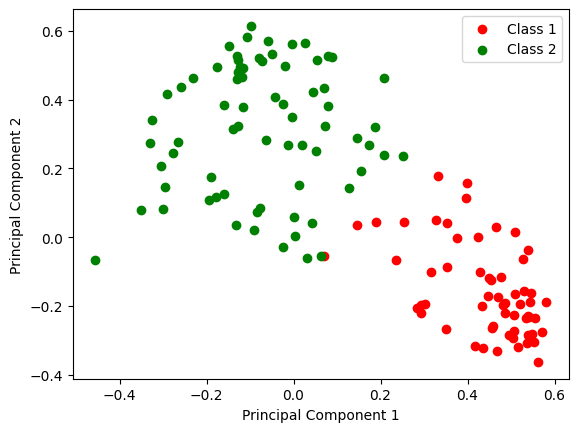

In [ ]:

# y = df.iloc[:, -1].values
# colors = ["r", "g"]
# labels = ["Class 1", "Class 2"]
# for i, color, label in zip(np.unique(y), colors, labels):
#     plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], color=color, label=label)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.show()